# <center>Medical Imaging</center><br><center>Practical session 1: Image formation and reconstruction  (04/10/22)</center>
***
*Jens Maebe, Florence Muller* <br>
*MEDISIP, Ghent University* <br>

# General
In total, there will be 4 practical sessions. For every session you should hand in a report **in groups of 2**. These reports will count for 5 out of 20 points for the exam. The topics of the sessions:

1. Image reconstruction in tomography, CT (25%)	

2. Monte Carlo simulations, SPECT (25%)	

3. Image processing part I (25%)

4. Image processing part II (25%)

***
Report (this notebook) due **2 weeks** after each session

- Concise and to the point answers to the questions

- Show that you understood what was going on and what the purpose of the exercise was

- Illustrate with figures (do not forget labels, legend, colorbar etc.)

- Hand in your **notebook** in **.ipynb** and **.html** format (File -> Download as -> HTML) via UFORA (UGent) or Canvas (VUB)

- It is normal that some pictures in the text are missing in the .html file, as long as your own plots show up correctly.

***
We are here to help you: ask questions!
- During the sessions
- Via mail:
    - Jens.Maebe@UGent.be
    - FlorenceMarie.Muller@UGent.be
***
In order to avoid problems with conflicting packages, we recommend creating a new virtual environment specifically for this course:

- if using `conda`: https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
- if using `pip`: https://docs.python.org/3/library/venv.html

If you do, make sure you install and launch jupyter in this new environment.
***
**Deadline for this session: 18 October 2022 at 23:59**.

# 1. Image formation
## 1.1 Fanbeam transform
In a CT scanner, the photon source is an X-ray tube. To make things easier, we approximate it as an infinitesimally small point source (figure 1).

<table>
    <tr>
        <td><img src="images/CT_schematic.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
        <td><img src="images/CT_open.jpg" width="300"/><figcaption><center>(b)</center></figcaption></td>
    </tr>
</table>

<center><i>Figure 1: (a) The different parts of a CT-scanner. (b) The inside of a CT scanner with the different parts and coordinates indicated.</i></center>

From this point source, photons are fired through the patient's body. The curved detector on the other side of the patient will detect the photons which have not been attenuated along their path through the body. Because we knew the number of fired photons ($I_0$), we can calculate the attenuation from the Beer-Lambert law:
\begin{equation}
	I=\int I_0\left(E\right) e^{-\int_0^L\mu(\vec{x},E) d\vec{x}} dE,
\end{equation}

with $I$ the number of detected photons (quanta) in a detector pixel, $E$ the photon energy (remember, X-rays generated by an X-ray tube are always polyenergetic!), $\mu$ the attenuation coefficient and $\vec{x}$ a vector representing the spatial coordinate along the line, from $0$ to $L$. If we ignore the energy spectrum for now and try to determine $\int \mu(\vec{x}) d\vec{x}$, we first have to calculate the log-attenuated values:

\begin{equation}
\int_0^L \mu(\vec{x}) d\vec{x} = \log\left(I_0\right) - \log\left( I \right).
\end{equation} 

<table>
    <tr>
        <td><img src="images/fanbeam.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
        <td><img src="images/parbeam.jpg" width="300"/><figcaption><center>(b)</center></figcaption></td>
    </tr>
        <td><img src="images/fansino.jpg" width="300"/><figcaption><center>(c)</center></figcaption></td>
        <td><img src="images/parsino.jpg" width="300"/><figcaption><center>(d)</center></figcaption></td>
    <tr>
</table>
<center><i>Figure 2: (a) The geometry of a fanbeam projection, (b) parallel beam projection, (c) a sinogram obtained from a fanbeam, (d) and parallel beam projection.
</i></center>

These so-called path lengths are what will be used for the rest of the practicum session.

The ideal path followed by each photon can be represented by a line connecting the X-ray source with the place of detection. All lines (for all detector pixels) for one rotation angle together form one fan beam projection (figure 2(a)). This represents one line in the sinogram. If we now rotate the source-detector pair around the patient and sample on different angles, a complete sinogram is obtained. 

This measured sinogram, containing data acquired from different angles, is the only data received from a CT scanner. This data can be used to directly reconstruct the original object in 3D. However, in this exercise lesson, we will reconstruct only from parallel projections and not from fan beam projections. Therefore, the fan beam projections have to be converted (a.k.a. rebinned) to parallel projection data.

## 1.2 The radon transform
Figure 2(c) and 2(d) respectively show sinograms obtained in fanbeam geometry and a parallel beam geometry. Forward projecting in a parallel beam geometry can be described mathematically by the Radon transform $R(\theta,x^\prime)$: 
\begin{equation}
	R(\theta,x^\prime)= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y)\delta(x^\prime - (x\cos\theta+y\sin\theta)) dx dy.
\end{equation}
Here, $f(x,y)$ represents the distribution of the attenuation coefficients in the body.
The Radon transform $R(\theta=\Theta,x\prime=X^\prime)$ can be interpreted as the sum (if we discretize $f(x,y)$ in pixels) of the attenuation coefficients at rotation angle $\Theta$ along a line perpendicular to the $x^\prime$-axis, crossing this axis at $X^\prime$. $x^\prime$ can be calculated from $\theta$, $x$ and $y$ as:
\begin{equation}
x^\prime= x \cos\theta +y \sin\theta,
\end{equation}
which is just a rotated $x$. These data can then be reconstructed by using the inverse of the Radon transform.

## <font color='blue'>Exercise 1: Parallel beam projection</font>
In this exercise you will create a virtual CT scanner data. However, unlike in reality, we will assume a perfect parallel beam which allows us to use the Radon transform for this projection. For this exercise and the following, we will use the scikit-image (`skimage`) package of python (https://scikit-image.org/).   

Start by creating an empty 64x64 image (2D matrix) where you add a point (cluster of 2x2 pixels with value 1) somewhere off-center. Project this data over a 360° angular range using 360 projection angles by making use of the `radon` function from scikit-image (`skimage.transform.radon`).

Repeat this with an 8 pixel long off-center 'line' instead of a point.

### <font color='blue'> Report</font>
<font color='blue'>In your report, we expect to see the two images you used with their sinograms. Explain the differences you see between both sinograms and reinforce your answer by making use of overlapping profiles (line plots) of the sinograms at certain angles. </font>

<font color='red'> SOLUTION: </font>

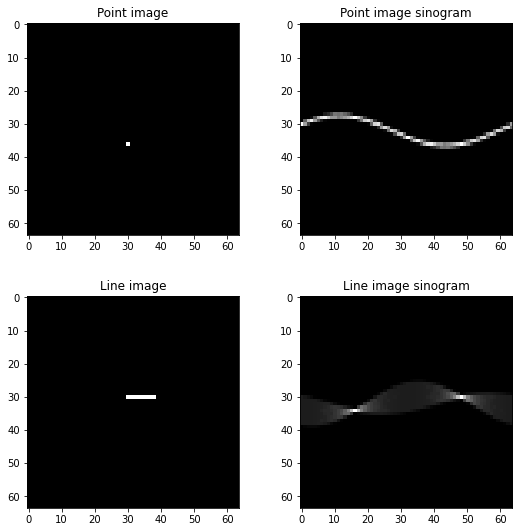

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import radon

# creating empty image and drawing a 2x2 point
image_1 = np.zeros((64, 64))
image_1[36:37, 30:31] = 1

theta = np.linspace(0, 360, max(image_1.shape), endpoint=False) # angles to project the image
sinogram_1 = radon(image_1, theta=theta) # sinogram of an uncentered point

# creating empty image and drawing an 8-pixel line
image_2 = np.zeros((64, 64)) 
image_2[30, 30:39] = 1

sinogram_2 = radon(image_2, theta=theta) # sinogram of an 8-pixel line

# ploting the different images 
figs, axs = plt.subplots(2, 2, figsize=(8, 8))
figs.tight_layout(pad=3.0)
axs[0,0].imshow(image_1, cmap='gray')
axs[0,0].set_title('Point image')

axs[0,1].imshow(sinogram_1, cmap='gray')
axs[0,1].set_title('Point image sinogram')

axs[1,0].imshow(image_2, cmap='gray')
axs[1,0].set_title('Line image')

axs[1,1].imshow(sinogram_2, cmap='gray')
axs[1,1].set_title('Line image sinogram')

plt.savefig(f"report/EX_1_Point_and_line_sinograms.png")
plt.show()


## <font color='blue'>Exercise 2: the sinogram</font>
To understand the content of a sinogram, we will take a closer look at the relation between an image and its sinogram. Therefore, start by making an image containing four points (each a cluster of 2x2 pixels). The first point should be in the center, the three other points should be located off-center, at different distances from the center. Make use of the `radon` function in scikit-image to project the image to sinogram space.

### <font color='blue'> Report</font>
<font color='blue'>Plot the original image and show it together with its sinogram obtained from a 360° and a 180° angular range. Use 90 projection angles in both cases.

Now answer these questions:
- Why do we call this a sinogram?
- What is the relation between the sinogram and the position in the original image?
- Would you use the 360° or the 180° angular range when the number of projection angles is fixed? Why? </font>

<font color='red'> SOLUTION: </font>

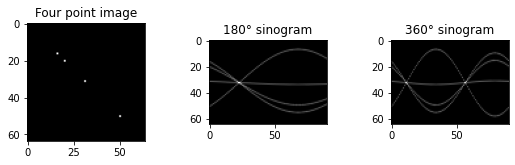

In [1]:
import numpy as np
from skimage.transform import radon
from matplotlib import pyplot as plt

image_3 = np.zeros((64, 64))
image_3[31:32, 31:32] = 1
image_3[20:21, 20:21] = 1
image_3[50:51, 50:51] = 1
image_3[16:17, 16:17] = 1

theta_180 = np.linspace(0, 180, 90, endpoint=False) # angles to project the image
theta_360 = np.linspace(0, 360, 90, endpoint=False) # angles to project the image
sinogram_180 = radon(image_3, theta=theta_180)
sinogram_360 = radon(image_3, theta=theta_360)


figs, axs = plt.subplots(1, 3, figsize=(8, 8))
figs.tight_layout(pad=3.0)
axs[0].imshow(image_3, cmap='gray')
axs[0].set_title('Four point image')

axs[1].imshow(sinogram_180, cmap='gray')
axs[1].set_title('180° sinogram')

axs[2].imshow(sinogram_360, cmap='gray')
axs[2].set_title('360° sinogram')

plt.savefig(f"report/EX_2_180_360_sinograms.png")
plt.show()


## <font color='blue'>Exercise 3: the sinogram (continued)</font>
To get an even better feel of what kind of data is included in a sinogram, download the file **Abdomen.bin** from Ufora and open it. This data is a slice of an in-vivo abdominal scan of a mouse, measured with a cone-beam micro-CT system in the Infinity lab. We already rebinned the cone-beam sinogram to parallel beam geometry for you and below you can find the code to import the sinogram data. Make use of the `iradon` function from scikit.image (`skimage.transform.iradon`) to reconstruct the sinogram into an image.

### <font color='blue'> Report</font>
<font color='blue'>Answer these questions:

- What is wrong with this image?
- What could be the physical cause (a scanner problem) of this? (Think about all elements contained in a CT system!)
- Correct for this artefact on the sinogram; plot the improved image and explain what you did</font>

In [13]:
import numpy as np

with open("Abdomen.bin", 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)
    sinogram_rec = np.transpose(np.reshape(data, [360,729]))

<font color='red'> SOLUTION: </font>

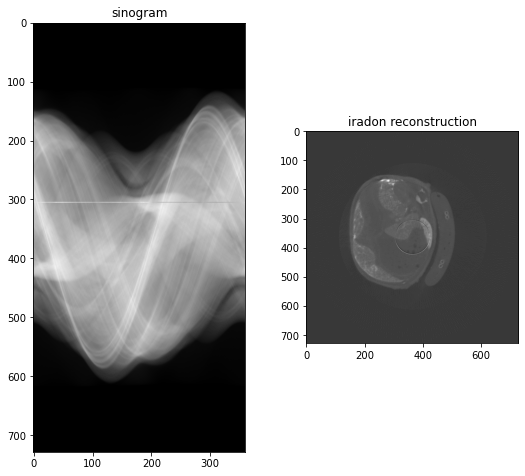

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import iradon


irad_theta = np.linspace(0., 360., sinogram_rec.shape[1], endpoint=False)
irad = iradon(sinogram_rec, theta=irad_theta)#, filter_name="ramp")

figs, axs = plt.subplots(1, 2, figsize=(8, 8))
figs.tight_layout(pad=3.0)
axs[0].imshow(sinogram_rec, cmap='gray')
axs[0].set_title('sinogram')

axs[1].imshow(irad, cmap='gray')
axs[1].set_title('iradon reconstruction')

plt.savefig(f"report/EX_3_irad_reconstruction.png")
plt.show()


## <font color='blue'>Exercise 4: Build your own forward projector</font>
In medical image reconstruction, the name ‘projector’ or ‘forward projector’ is given to an operation
which transforms data from image space to projection space (the sinogram). In this exercise, we want
you to implement your own projector in Python, as an alternative to the `radon` function. Implement this projector by combining image rotation followed by summation along one axis. You should keep x' and sum along y'.

Start with a 256×256 image that you generate with the `shepp_logan_phantom()` function from `skimage.data`. Now use the functions `skimage.transform.rotate` and `np.sum` to perform projections and to build a sinogram. Use 360 projection angles over an angular range of 360 . Also use `radon` to forward project the original image, so we can compare your implementation to the one you try to mimic.


### <font color='blue'> Report</font>
<font color='blue'>Show the sinogram obtained with your own projector and compare to the sinogram obtained with the radon function. </font>

In [1]:
import numpy as np
from skimage.data import shepp_logan_phantom
from matplotlib import pyplot as plt
from skimage.transform import rescale, rotate, radon

image_phantom = shepp_logan_phantom()
image_phantom = rescale(image_phantom, scale=256/400) # rescale from 400x400 to 256x256

<font color='red'> SOLUTION: </font>

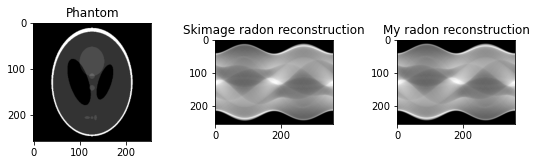

In [2]:
My_fp_theta = np.linspace(0, 360, 360, endpoint=False)
fp_rad = radon(image_phantom, theta=My_fp_theta)

rotations = np.array([rotate(image_phantom, -theta) for theta in My_fp_theta]) # array of the different rotations of the image (matrix)
my_sin = np.array([rot.sum(axis=0) for rot in rotations]).T # sum along Y axis and then transpose

# plotting
figs, axs = plt.subplots(1, 3, figsize=(8, 8))
figs.tight_layout(pad=3.0)
axs[0].imshow(image_phantom, cmap='gray')
axs[0].set_title('Phantom')

axs[1].imshow(fp_rad, cmap='gray')
axs[1].set_title('Skimage radon reconstruction')

axs[2].imshow(my_sin, cmap='gray')
axs[2].set_title('My radon reconstruction')

plt.savefig(f"report/EX_4_My_fp_rad_reconstruction.png")
plt.show()


## 2. Image reconstruction
### 2.1 Backprojection
The backprojection operation describes the transformation back from projection space to image space and it is the mathematical adjoint of the Radon transform:

\begin{equation}
B(x,y) = 
\int_0^\pi R(\theta,x')d\theta
\end{equation} 

Here, $B(x, y)$ represents the backprojected image, and $R(\theta, x′)$ is the sinogram. For one fixed angle $\Theta$, the backprojection $B(x, y; \theta = \Theta)$ is performed by smearing the values of $R(\theta = \Theta, x′)$ along perpendicular lines (Figure 4). If we repeat this operation for all angles $\theta$, the sum of all $B(x,y;\theta = \Theta)$ will form $B(x, y)$.

<table>
    <tr>
        <td><img src="images/backproj.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
    </tr>
</table>
<center><i>Figure 4: Backprojection of all values of R(θ,x′) to a rotated image for a fixed angle Θ.
</i></center>


## <font color='blue'>Exercise 5: Build you own backprojector</font>
We can backproject the sinogram obtained in the previous exercise by first smearing $R(\theta = \theta,x′)$ into a rotated image. When we rotate this image back to the original position and sum over all angles, we obtain a backprojection of the sinogram. Use the functions `skimage.transform.rotate` and `numpy.matlib.repmat` to implement a backprojector. Work on the sinogram you created in exercise 2. 

### <font color='blue'> Report</font>
<font color='blue'> In your report:
- show your backprojection for 10 angles over a range of 0-360
- show your backprojection for 90 angles over a range of 0-360 

Answer these questions:
- What is the difference between the original image and your backprojection image? 
- How can the backprojection be improved? </font>

<font color='red'> SOLUTION: </font>

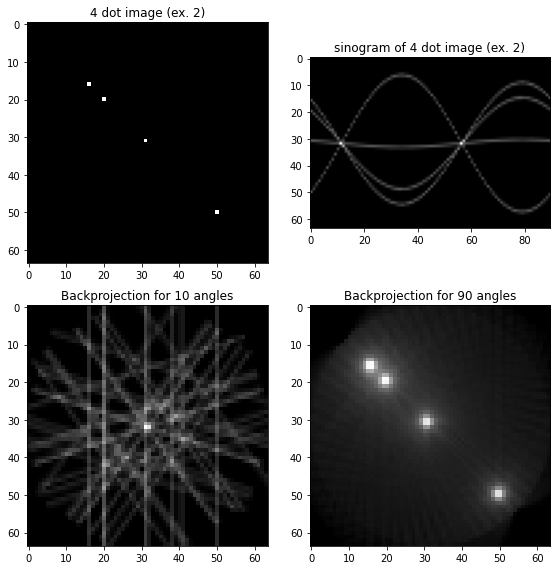

In [16]:
# run exersice 2 cell beforehand
from numpy.matlib import repmat
from skimage.transform import rotate

# general function for own back projection
def my_back_projector(image, sinog, ang_range, num_angles):
    my_bp_angles = np.linspace(0, ang_range, num_angles, endpoint=False)
    my_back_projection = np.zeros(image.shape)

    for i in range(len(my_bp_angles)):
        theta = my_bp_angles[i]
        proy = np.array([sinog[:, i]]*image.shape[0])
        proy = rotate(proy, theta)
        my_back_projection += proy
    
    return my_back_projection

my_bp_10 = my_back_projector(image_3, sinogram_360, 360, 10)
my_bp_90 = my_back_projector(image_3, sinogram_360, 360, 90)

# plotting
figs, axs = plt.subplots(2, 2, figsize=(8, 8))
figs.tight_layout()

axs[0,0].imshow(image_3, cmap='gray')
axs[0,0].set_title('4 dot image (ex. 2)')

axs[0,1].imshow(sinogram_360, cmap='gray')
axs[0,1].set_title('sinogram of 4 dot image (ex. 2)')

axs[1,0].imshow(my_bp_10, cmap='gray')
axs[1,0].set_title('Backprojection for 10 angles')

axs[1,1].imshow(my_bp_90, cmap='gray')
axs[1,1].set_title('Backprojection for 90 angles')

plt.savefig(f"report/EX_5_My_bp_10_90.png")
plt.show()

## 2.3 Filtered backprojection
To understand the origin of the blur in the reconstructed image, take a look at the sampling in the Fourier domain.
Take the backprojection from a single angle:

\begin{equation}
B(x,y;\theta=\Theta) = R(\theta = \Theta,x')
\end{equation} 

$$\begin{aligned}
\mathcal{B}(\nu_x,\nu_y;\theta=\Theta) &=& \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} B(x,y;\theta=\Theta) e^{-2\pi i(x\nu_x+y\nu_y)}dx dy \\
&=&  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} R(\theta=\Theta,x^\prime) e^{-2\pi i(x\nu_x+y\nu_y)}dx^\prime dy^\prime \\
&=& \mathcal{R}(\theta=\Theta,\nu_{x^\prime}) \delta(\nu_{y^\prime}) \\
\end{aligned}$$

From the central slice theorem (course notes) we know that $\mathcal{R}(\theta=\Theta,\nu_{x^\prime})=\mathcal{F}(\nu_x,\nu_y)\mid_{\nu_{y^\prime}=0}$. Thus, **every backprojection along 1 angle is actually equal to one line of the Fourier transform of the original image!** Superimposing all lines and then taking the inverse Fourier transform would result in our blurry backprojection image. In other words, the blur in the reconstructed image arises from the fact that the center of the Fourier space will be oversampled due to the radial sampling. You get an overestimation of the low frequency components and an underestimation of the high frequency components. This is illustrated in figure 5.

<table>
    <tr>
        <td><img src="images/sampling_fourier.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
        <td><img src="images/grid.jpg" width="300"/><figcaption><center>(b)</center></figcaption></td>
        <td><img src="images/ramp.jpg" width="300"/><figcaption><center>(c)</center></figcaption></td>
</table>
<center><i>Figure 5: (a) Sampling of the Fourier space using 20 backprojections. (b) The radial grid on which the Fourier space is sampled. (c) The ramp filtered used to compensate for the oversampling.
</i></center>

To compensate for the oversampling at lower frequencies, you should use a filter which is proportional to the circumference of a circle defined with radius $\nu =\sqrt{\nu_x^2+\nu_u^2}$. Proportionality with the circumference is equal to proportionality with the radius. Thus our filter will be $\nu$, also called a ramp filter (Figure 5(c)). Thanks to the above, we can discriminate three ways to get to our filtered backprojection, of which the second is the simplest and will be used in the next exercise:

1. **Projections** $\rightarrow$ backprojection $\rightarrow$ 2D FT $\rightarrow$ filter with 2D ramp filter $\rightarrow$ 2D IFT $\rightarrow$ **Filtered reconstructed image**
2. **Projections** $\rightarrow$ 1D FT $\rightarrow$ filter with 1D ramp filter $\rightarrow$ 1D IFT $\rightarrow$ backprojection $\rightarrow$ **Filtered reconstructed image**
3. **Projections** $\rightarrow$ backprojection $\rightarrow$ superimposing all lines in correct angle $\rightarrow$ interpolation to get more uniform grid in 2D FT space $\rightarrow$ 2D IFT $\rightarrow$ **Filtered reconstructed image**


## <font color='blue'>Exercise 6: Filtered backprojection</font>
In this exercise, you will have to solve the problem of oversampling with the second method. Work with the sinogram obtained with radon in exercise 4 (Shepp-Logan phantom). Use all 90 angles. First you will have to transform the sinogram to Fourier space. Next, filter your projection data using a ramp filter. After returning to sinogram space with an inverse Fourier transform, backproject the filtered sinogram using your backprojector from the previous exercise. Compare your result to the result of applying `iradon(..., filter_name="ramp")` to your unfiltered sinogram data. Also compare with your own backprojector without filtering.

### Remark
Make use of the `np.fft.rfft` and `np.fft.irfft` functions to perform the Fourier and inverse Fourier transforms on a real-valued input. This only computes the positive frequencies, so our ramp filter should also only be defined for the positive frequencies (see code below).

### <font color='blue'> Report</font>
<font color='blue'> 
Plot an image of both your own filtered and unfiltered reconstructions and the iradon-backprojection. Also show the original and filtered sinograms. Is the result better with filtering? Limit the number of angles to 20. What happens now?</font>

In [3]:
import numpy as np
from numpy.fft import rfft, irfft
from skimage.data import shepp_logan_phantom
from skimage.transform import rescale, iradon

image = shepp_logan_phantom()
image = rescale(image, scale=256/400)
ramp = np.linspace(0, 1, num=256//2 + 1)



<font color='red'> SOLUTION: </font>

## 3. Read and visualize images
### 3.1 DICOM 
DICOM (Digital Imaging and Communications in Medicine) is a standard protocol for the management and transmission of medical images and related data (e.g. patient information, acquisition parameters, imaging modality and reconstruction specifications). The use of DICOM as standard file format for medical images is to ensure the interoperability of systems used to produce, store, share, display, and process medical images.

<table>
    <tr>
        <td><img src="images/DICOM_icon.jpg" width="100"/></td>
    </tr>
</table>
<center><i>Figure 6: DICOM Image File. A DICOM file is an image saved in the DICOM format and contains an image from a medical scan including identification data for patients, imaging modality and scanner type. 
</i></center>


**DICOM Tags**

A DICOM image file consists of a number of attributes, including items such as name, ID, etc., and also one special attribute containing the image pixel data. These so-called DICOM tags are meta-data elements that identify and describe each DICOM image object. 

A DICOM tag is composed of the following most important parts:
* a tag that identifies the attribute, usually in the format (XXXX,XXXX) with hexadecimal numbers, and may be divided further into DICOM Group Number and DICOM Element Number;
* a DICOM Value Representation (VR) that describes the data type and format of the attribute value.

Also see: https://dicom.innolitics.com/ciods

## <font color='blue'>Exercise 7: Read a DICOM image and identify DICOM tags</font>
In this exercise you will familiarize yourself with the Pydicom module (https://pydicom.github.io/) which is the Python package used to work with DICOM datasets. We provide you with a whole-body image of a mouse acquired with the X-CUBE, a micro-CT scanner in the Infinity lab. 

Start by installing and importing the required package(s). Next you can read and parse the DICOM file with (`pydicom.dcmread('path/to/file)`). Hint, you can view the contents of the entire dataset by using `print()`. For this short exercise, you should access particular elements (attributes) in the dataset through its tag to find the answers to the following questions.

### <font color='blue'> Report</font>
<font color='blue'>For this short exercise, you should access particular elements (attributes) in the dataset through its tag to find the answers to the following questions.</font>

* What is the imaging modality?
* When (date and time) was the scan acquired?   
* Which type of reconstruction algorithm was used? What voxel size was used to reconstruct the image? 
* What were the current and voltage settings used on the scanner to perform the acquisition? 

<font color='red'> SOLUTION: </font>

## <font color='blue'>Exercise 8: Visualize the DICOM image</font>
In this exercise you will visualize the reconstructed mouse images in the transverse, coronal and sagittal view. To do so, you need to first convert the raw pixel data values to a specific physical quantity, such as Hounsfield units for CT. We provide you with the function (`dicom2HU`) that performs the conversion and returns a NumPy array.  

In [4]:
def dicom2HU(dicom):
    values_raw = dicom.pixel_array
    try:
        b0 = float(dicom['RescaleIntercept'].value)
        b1 = float(dicom['RescaleSlope'].value)
    except:
        b0 = float(dicom['SharedFunctionalGroupsSequence'][0]
                            ['PixelValueTransformationSequence'][0]
                                ['RescaleIntercept'].value)
        b1 = float(dicom['SharedFunctionalGroupsSequence'][0]
                            ['PixelValueTransformationSequence'][0]
                                ['RescaleSlope'].value)
    values_HU = b1 * values_raw + b0
    return values_HU 

### <font color='blue'> Report</font>
<font color='blue'>Plot a transverse, coronal and sagittal slice. You should find a slice on which the lung and liver of the mouse are visible. </font>

<font color='red'> SOLUTION: </font>